### Easy

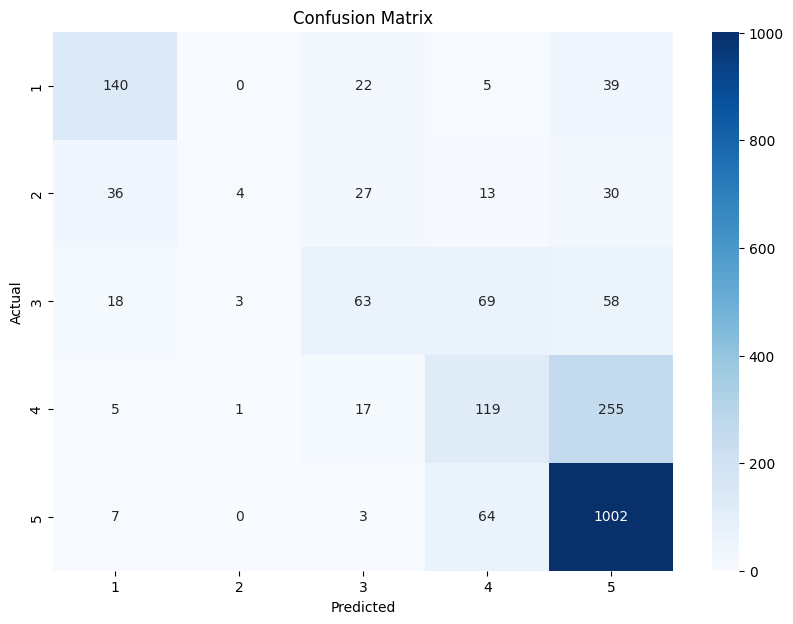

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/data.csv')

data = data[['rating', 'text']].dropna()

data['text'] = data['text'].apply(lambda txt: txt.translate(str.maketrans('', '', string.punctuation)))

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data['text'])
y = data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)

ratings = ['1', '2', '3', '4', '5']

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=ratings, yticklabels=ratings)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Normal

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")


def prepare(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = [word for word in text.split() if word.lower() not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)


data['text'] = data['text'].apply(prepare)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
y = data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Classifier': SVC(),
    'Random Forest': RandomForestClassifier()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


              precision    recall  f1-score   support

           1       0.63      0.68      0.66       206
           2       0.33      0.03      0.05       110
           3       0.49      0.35      0.41       211
           4       0.45      0.30      0.36       397
           5       0.73      0.92      0.81      1076

    accuracy                           0.66      2000
   macro avg       0.53      0.45      0.46      2000
weighted avg       0.62      0.66      0.62      2000

              precision    recall  f1-score   support

           1       0.65      0.67      0.66       206
           2       0.67      0.02      0.04       110
           3       0.50      0.35      0.41       211
           4       0.48      0.20      0.28       397
           5       0.70      0.95      0.80      1076

    accuracy                           0.66      2000
   macro avg       0.60      0.44      0.44      2000
weighted avg       0.63      0.66      0.60      2000

              precisio

C:\Users\dv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [61]:
reviews = [
    "The flight was amazing! The staff were incredibly polite and the food was delicious.",
    "I hated every moment of the flight. The service was bad, and the seats were uncomfortable.",
    "The flight was okay, the food was decent but the legroom was terrible.",
    "Never have I experienced such exceptional service! The crew went above and beyond.",
    "Although the flight was on time, the experience was ruined by the unhelpful staff and poor food quality.",
    "Despite the slight delay, the overall experience was wonderful due to the friendly staff.",
    "The staff were kind, but the plane was filthy and the entertainment system was broken.",
    "Everything about the flight was perfect, from the comfortable seats to the tasty meals.",
    "The flight was delayed, the seats were cramped, and the food was inedible.",
    "Oh sure, the flight attendants were great, if you enjoy being ignored for most of the trip."
]

for review in reviews:
    print(review)
    for name, model in models.items():
        processed = prepare(review)
        x = vectorizer.transform([processed])
        print(name, model.predict(x))
    print('\n')


The flight was amazing! The staff were incredibly polite and the food was delicious.
Logistic Regression [5]
Support Vector Classifier [5]
Random Forest [5]


I hated every moment of the flight. The service was bad, and the seats were uncomfortable.
Logistic Regression [3]
Support Vector Classifier [3]
Random Forest [5]


The flight was okay, the food was decent but the legroom was terrible.
Logistic Regression [4]
Support Vector Classifier [4]
Random Forest [5]


Never have I experienced such exceptional service! The crew went above and beyond.
Logistic Regression [5]
Support Vector Classifier [5]
Random Forest [5]


Although the flight was on time, the experience was ruined by the unhelpful staff and poor food quality.
Logistic Regression [3]
Support Vector Classifier [3]
Random Forest [5]


Despite the slight delay, the overall experience was wonderful due to the friendly staff.
Logistic Regression [4]
Support Vector Classifier [4]
Random Forest [5]


The staff were kind, but the pl

According to provided benchmarks, both LR and SVM display equal results, predicting relatively valid rating. Although is some cases, the miss
On contrary, Random Forest perform the worst, noticeably overestimating the actual rating of the review